In [17]:
import os
import parse
import fasttext
import numpy as np
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier


datadir = "/home/peterr/macocu/task5_webgenres/data/final/fasttext1"


def parse_test_file(path: str):
    """Reads fasttext formatted file and returns labels, texts."""
    with open(path, "r") as f:
        content = f.readlines()
    pattern = "{label} {text}\n"
    p = parse.compile(pattern)

    labels, texts = list(), list()
    for line in content:
        rez = p.parse(line)
        if rez is not None:
            labels.append(rez["label"])
            texts.append(rez["text"])
    return labels, texts

def prediction_to_label(prediction):
    """Transforms predicitons as returned by fasttext into pure labels."""
    import numpy as np
    return np.array(prediction[0])[:, 0]

def plot_cm(y_true, y_pred, labels, save=False, title=None):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    import matplotlib.pyplot as plt
    cm = confusion_matrix(y_true, y_pred, labels=labels, )
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, cmap="Oranges")
    classNames = labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=90)
    plt.yticks(tick_marks, classNames)
    microF1 = f1_score(y_true, y_pred, labels=labels, average ="micro")
    macroF1 = f1_score(y_true, y_pred, labels=labels, average ="macro")

    print(f"{microF1=:0.4}")
    print(f"{macroF1=:0.4}")

    metrics = f"{microF1=:0.4}, {macroF1=:0.4}"
    if title:
        plt.title(title +";\n" + metrics)
    else:
        plt.title(metrics)
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()
    return microF1, macroF1


all_labels = [
 '__label__Promotion_of_Services',
 '__label__Instruction',
 '__label__Review',
 '__label__Information/Explanation',
 '__label__Promotion_of_a_Product',
 '__label__News/Reporting',
 '__label__Promotion',
 '__label__Announcement',
 '__label__Invitation',
 '__label__Opinion/Argumentation',
 '__label__Forum',
 '__label__Legal/Regulation',
 '__label__Other',
 '__label__Opinionated_News',
 '__label__Call',
 '__label__List_of_Summaries/Excerpts']


test_full = os.path.join(datadir, "test_onlykeep_False_onlyprimary_True_dedup_False.fasttext")
test_dd = os.path.join(datadir, "test_onlykeep_False_onlyprimary_True_dedup_True.fasttext")
train_full = os.path.join(datadir, "train_onlykeep_False_onlyprimary_True_dedup_False.fasttext")
train_dd = os.path.join(datadir, "train_onlykeep_False_onlyprimary_True_dedup_True.fasttext")

microF1=0.0668
macroF1=0.06116


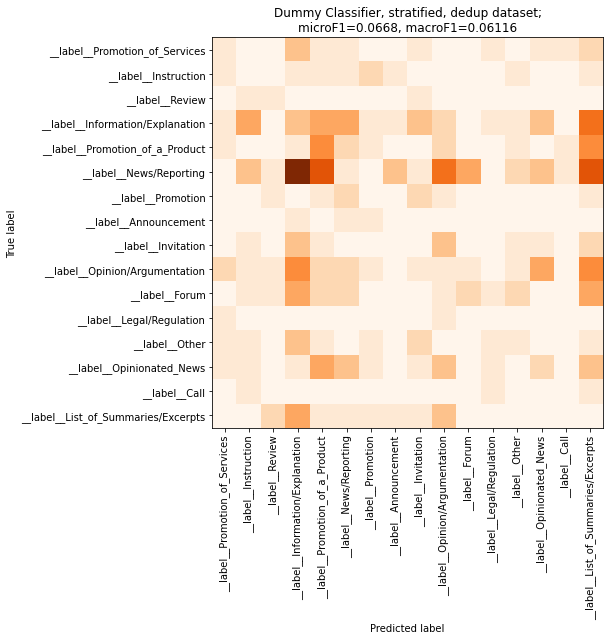

microF1=0.06544
macroF1=0.03683


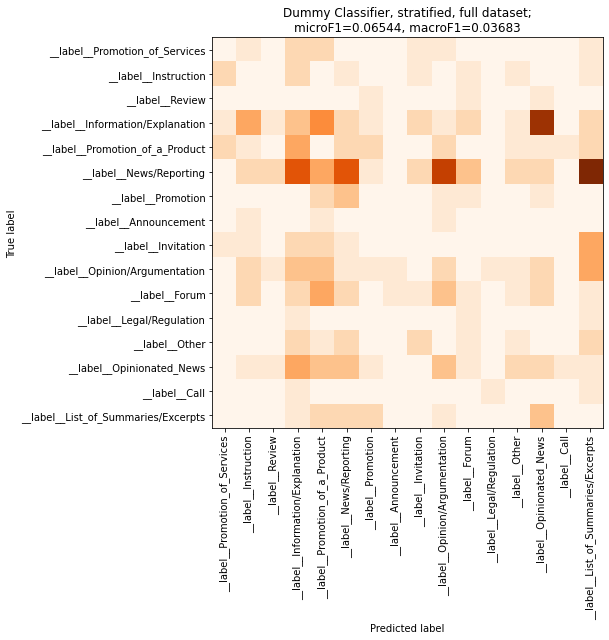

microF1=0.1379
macroF1=0.01515


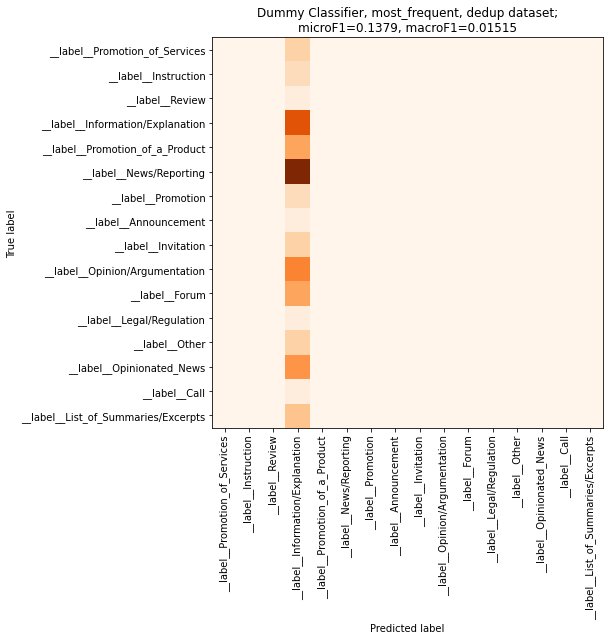

microF1=0.1429
macroF1=0.01562


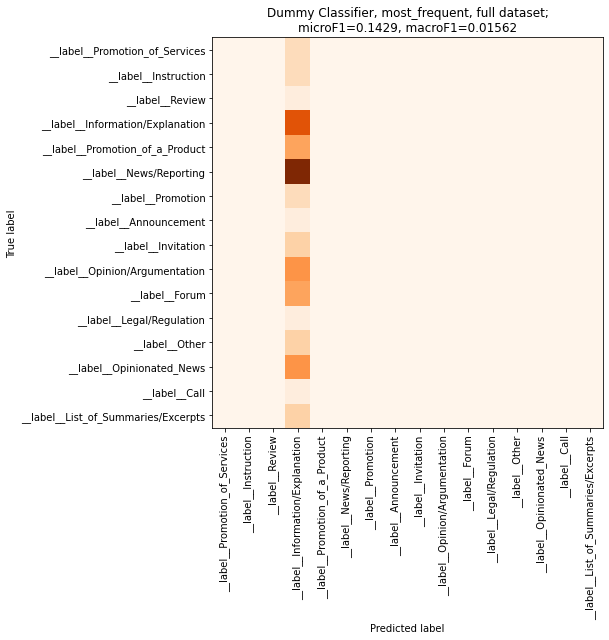

In [21]:
for strategy in ["stratified", "most_frequent"]:
    for test, train, wording in zip([test_full, test_dd], [train_full, train_dd], ["dedup", "full"]) :
        y_true, X_test = parse_test_file(test)
        y_train, X_train = parse_test_file(train)
        clf = DummyClassifier(strategy=strategy)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        imagedir = "/home/peterr/macocu/task5_webgenres/images"
        plot_cm(y_true, y_pred, all_labels, 
        save=imagedir+f"/Dummy_stratified_{wording}_{strategy}.png", 
        title=f"Dummy Classifier, {strategy}, {wording} dataset")

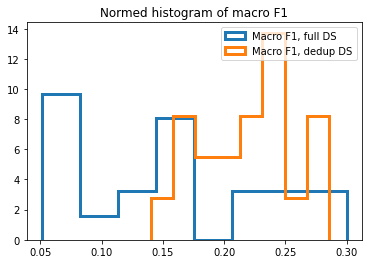

In [56]:
full_micros = [0.19540229885057475, 0.3448275862068966, 0.16091954022988506, 0.22988505747126436, 0.3563218390804598, 0.3563218390804598, 0.38150289017341044, 0.22988505747126436, 0.367816091954023, 0.3563218390804598, 0.22988505747126436, 0.4418604651162791, 0.3448275862068966, 0.41618497109826585, 0.3699421965317919, 0.3448275862068966, 0.3333333333333333, 0.20689655172413793, 0.3333333333333333, 0.19540229885057475]
full_macros =  [0.06919525367106012, 0.1443772741984523, 0.05160361842105263, 0.08475135975135975, 0.2171654372170479, 0.15405757205919374, 0.2525759876088824, 0.08117968987534205, 0.15973622311827956, 0.15459015950447402, 0.06848155929038283, 0.29884148570699803, 0.14479530885780884, 0.29985279057859704, 0.24497525500814976, 0.15026041666666667, 0.21627707270799376, 0.07270929466051416, 0.1405086210102427, 0.07957330659536542]

dedup_macros = [0.2857071869909201, 0.21658307591811427, 0.19719524608431258, 0.2780144106268544, 0.25531453500203505, 0.24581870675620676, 0.23545801642744366, 0.23563435833172675, 0.2383971216691805, 0.1611904761904762, 0.2213362332112332, 0.23837804352510233, 0.1707476825075509, 0.26937347541264334, 0.16604173604173603, 0.217774259462239, 0.18686368778280543, 0.20113260582010584, 0.18032280219780217, 0.14008287370356334]
dedup_micros = [0.42857142857142855, 0.36363636363636365, 0.31137724550898205, 0.39285714285714285, 0.40718562874251496, 0.3493975903614458, 0.3734939759036145, 0.3515151515151515, 0.37575757575757573, 0.31137724550898205, 0.35714285714285715, 0.3373493975903615, 0.30120481927710846, 0.4166666666666667, 0.30952380952380953, 0.36363636363636365, 0.3414634146341463, 0.32727272727272727, 0.3333333333333333, 0.2857142857142857]
import matplotlib.pyplot as plt
imagedir = "/home/peterr/macocu/task5_webgenres/images"
bins = 8
density = True


plt.hist(full_macros, label="Macro F1, full DS", density=density, histtype="step", lw=3,bins=bins, color="tab:blue")
#xs, kde = compute_kde(full_macros)
# plt.plot(xs, kde, color="tab:blue")
plt.hist(dedup_macros, label="Macro F1, dedup DS", density=density, histtype="step", lw=3,bins=bins, color="tab:orange")
#xs, kde = compute_kde(dedup_macros)
# plt.plot(xs, kde, color="tab:orange")


plt.title("Normed histogram of macro F1")
plt.legend()
plt.savefig(imagedir+"/metrics_distribution_macro.png")
plt.show()

plt.hist(full_micros, label="Micro F1, full DS", density=density, histtype="step", lw=3,bins=bins, color="tab:blue")
plt.hist(dedup_micros, label="Micro F1, dedup DS", density=density, histtype="step", lw=3,bins=bins, color="tab:orange")
plt.title("Normed histogram of micro F1")
plt.legend()
plt.savefig(imagedir+"/metrics_distribution_micro.png")
plt.show()

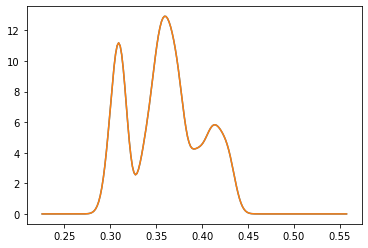

In [43]:
import numpy as np
from scipy.stats import gaussian_kde
def compute_kde(data):
    density = gaussian_kde(data)
    xs = np.linspace(min(data)*0.75,max(data)*1.3,200)
    density.covariance_factor = lambda : .2
    density._compute_covariance()
    ys = density(xs)
    return xs, ys

xs, kde = compute_kde(dedup_micros)
plt.plot(xs, kde)
xs, kde_normed = compute_kde(dedup_micros, normed=True)
plt.plot(xs, kde_normed)
plt.show()
